<a href="https://colab.research.google.com/github/Olaoluwakiitan-Olabiyi/BMI-Calculator/blob/master/dsn_kaggle_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [623]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('dsn-kaggle-project')
jovian.set_colab_id('155nLY-ddz0yv2rx-AjUY7TYK5AS0q_86')

# dsn-kaggle-project

Use the "Run" button to execute the code.

In [3]:
!pip install jovian --upgrade --quiet

In [4]:
import jovian

In [5]:
# Execute this to save new versions of the notebook
jovian.commit(project="dsn-kaggle-project")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/olaoluwakiitan-olabiyi/dsn-kaggle-project


'https://jovian.ai/olaoluwakiitan-olabiyi/dsn-kaggle-project'

## PROBLEM STATEMENT

In today’s world of automation, the skills and knowledge of a person could be utilized at the best places possible by automating tasks wherever possible.

 As a part of the HealthIsWealth hospital automation system, you have been contracted as a professional data scientist who will build a system that would predict and estimate whether the patient should be categorized as an incare patient or an outcare patient with the help of several data points about the patients, their conditions and lab tests.


The difference between an inpatient and outpatient care is how long a patient must remain in the facility where they have the procedure done.


Inpatient care requires overnight hospitalization. Patients must stay at the medical facility where their procedure was done (which is usually a hospital) for at least one night. During this time, they remain under the supervision of a nurse or doctor.


Patients receiving outpatient care do not need to spend a night in a hospital. They are free to leave the hospital once the procedure is over. In some exceptional cases, they need to wait while anesthesia wears off or to make sure there are not any complications. As long as there are not any serious complications, patients do not have to spend the night being supervised.



In [7]:
pip install opendatasets --upgrade --quiet

In [8]:
import opendatasets as od

DSN_hackathon ='https://www.kaggle.com/c/data-science-nigeria-patient-treatment/data'

od.download(DSN_hackathon)



Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: olaoluwakiitan
Your Kaggle Key: ··········


100%|██████████| 91.0k/91.0k [00:00<00:00, 28.6MB/s]


Extracting archive ./data-science-nigeria-patient-treatment/data-science-nigeria-patient-treatment.zip to ./data-science-nigeria-patient-treatment


###IMPORT LIBRARIES

In [543]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

### Import Datasets

In [544]:
in_out_train =  '/content/data-science-nigeria-patient-treatment/train.csv'
in_out_test = '/content/data-science-nigeria-patient-treatment/test.csv'
sample_submission = '/content/data-science-nigeria-patient-treatment/sample_submission.csv'


In [545]:
train=pd.read_csv(in_out_train)
test=pd.read_csv(in_out_test)
sample = pd.read_csv (sample_submission)

In [546]:
train.head(10)

,patient_id_,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,patient_id_1270,43.6,14.5,5.52,3.0,237,27.5,33.6,81.7,32,F,0
1,patient_id_1762,44.3,14.4,5.09,7.3,255,29.7,32.9,90.4,40,M,0
2,patient_id_3355,36.2,12.5,4.57,7.8,263,28.9,35.0,82.6,65,F,0
3,patient_id_2443,46.1,14.7,5.38,8.5,320,28.6,32.2,88.8,52,M,0
4,patient_id_3414,31.8,10.9,4.05,26.9,220,28.6,34.8,82.3,66,F,1
5,patient_id_1921,36.3,12.4,4.35,5.3,258,30.2,34.6,87.2,43,F,1
6,patient_id_537,46.8,15.5,5.65,3.8,35,28.7,33.5,85.7,21,M,1
7,patient_id_1589,34.5,11.3,4.20,13.8,286,28.6,33.2,86.0,37,F,1
8,patient_id_2039,36.7,12.5,4.44,19.4,87,29.8,34.5,86.3,45,F,1
9,patient_id_3624,38.8,12.6,4.93,15.5,389,26.9,32.9,81.8,68,F,1


In [547]:
train.tail(5)

,patient_id_,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
3083,patient_id_4149,40.5,13.8,4.54,10.9,290,32.1,34.5,93.1,79,M,0
3084,patient_id_1890,28.8,10.5,3.49,20.6,735,32.3,37.1,87.2,43,F,1
3085,patient_id_350,45.9,15.4,5.64,3.9,281,28.5,33.9,84.2,14,M,0
3086,patient_id_79,32.6,10.2,5.36,4.4,303,20.0,31.8,62.9,3,M,1
3087,patient_id_3927,41.5,14.0,5.23,4.3,176,28.1,34.1,82.3,74,F,0


In [548]:
test.head()

,patient_id_,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
0,patient_id_4373,33.0,11.1,4.15,11.1,329,28.4,34.1,83.2,89,F
1,patient_id_2204,34.0,11.1,4.23,9.7,120,27.9,33.1,84.1,47,F
2,patient_id_93,42.4,14.1,5.71,4.3,239,25.8,33.6,76.7,3,M
3,patient_id_798,40.3,13.4,5.19,4.7,208,27.1,33.7,80.5,25,F
4,patient_id_789,33.3,11.4,4.28,7.5,206,28.3,34.7,81.3,25,F


In [549]:

sample

,patient_id_,SOURCE
0,patient_id_4373,1
1,patient_id_2204,1
2,patient_id_93,1
3,patient_id_798,1
4,patient_id_789,1
...,...,...
1319,patient_id_2070,1
1320,patient_id_1789,1
1321,patient_id_1725,1
1322,patient_id_3707,1


### Exploratory Data Analysis

- NB:
Whatever cleaning or preprocessing performed on the train data should also be done on the test data.

In [550]:

train.shape


(3088, 12)

In [551]:
test.shape


(1324, 11)

In [552]:


sample.shape

(1324, 2)

In [553]:
train.columns

Index(['patient_id_', 'HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE',
       'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE', 'SEX',
       'SOURCE'],
      dtype='object')

In [554]:
target = [col for col in train.columns if col not in test.columns]
target

['SOURCE']

## Insights

- The Source column is the target column.
-  The Source column has two categories and it is an int datatype.
- From the barchart ,the 'SOURCE' Column is somewhat balanced- 0=59% and 1= 41%
- There are no missing values in the dataset

In [555]:



train ['SOURCE'].head(10)

0    0
1    0
2    0
3    0
4    1
5    1
6    1
7    1
8    1
9    1
Name: SOURCE, dtype: int64

In [556]:

train ['SOURCE'].value_counts() #checking the number of categories present


0    1822
1    1266
Name: SOURCE, dtype: int64

In [557]:

percent_source = (train ['SOURCE'].value_counts()) / len (train['SOURCE'])  * 100  # checking %number of categories present
percent_source

0    59.002591
1    40.997409
Name: SOURCE, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


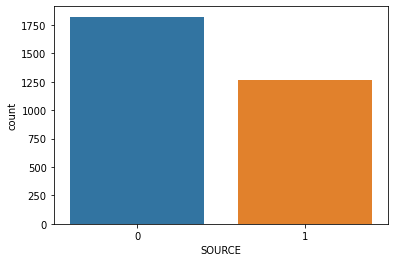

In [558]:
sns.countplot(train['SOURCE'], label = 'counts') # visulaize the value_counts in the target variable 
# From the barchart below, the 'SOURCE' Column is somewhat balanced.

In [559]:
#sns.kdeplot(train.SOURCE) ### distribution of the 'SOURCE column'

In [560]:
train.describe() # check for the statistics

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SOURCE
count,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000
mean,38.381865,12.638472,4.752160,8.788504,260.652850,28.218264,33.352364,84.540026,46.617876,0.409974
std,6.070420,2.104983,0.792281,5.055580,115.504157,2.658656,1.227691,6.814936,21.684646,0.491908
min,13.900000,4.300000,1.690000,1.200000,13.000000,14.900000,26.400000,54.000000,1.000000,0.000000
25%,34.500000,11.275000,4.240000,5.700000,191.000000,27.200000,32.700000,81.500000,29.000000,0.000000
50%,38.800000,12.800000,4.790000,7.600000,259.000000,28.700000,33.400000,85.400000,47.000000,0.000000
75%,42.700000,14.200000,5.260000,10.400000,325.000000,29.800000,34.100000,88.700000,64.000000,1.000000
max,69.200000,18.100000,8.070000,76.700000,1188.000000,36.800000,39.000000,105.300000,99.000000,1.000000


In [561]:
train.info() ##checking the data details present 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3088 entries, 0 to 3087
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patient_id_   3088 non-null   object 
 1   HAEMATOCRIT   3088 non-null   float64
 2   HAEMOGLOBINS  3088 non-null   float64
 3   ERYTHROCYTE   3088 non-null   float64
 4   LEUCOCYTE     3088 non-null   float64
 5   THROMBOCYTE   3088 non-null   int64  
 6   MCH           3088 non-null   float64
 7   MCHC          3088 non-null   float64
 8   MCV           3088 non-null   float64
 9   AGE           3088 non-null   int64  
 10  SEX           3088 non-null   object 
 11  SOURCE        3088 non-null   int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 289.6+ KB


- There are two categorical columns(patient_id, and SEX). We can drop the id since it is not relevant to the model building.

We will then encode the SEX column

## Splitting the dataframe into numerical and categorical columns

In [562]:
cat_feat= [feat for feat in train.columns if train[feat].dtype =='O']
cat_feat

['patient_id_', 'SEX']

In [563]:
#test_cat_feat= [feat for feat in test.columns if test[feat].dtype =='O']
#test_cat_feat

In [564]:

num_feat= [feat for feat in train.columns if feat not in cat_feat ]
num_feat

['HAEMATOCRIT',
 'HAEMOGLOBINS',
 'ERYTHROCYTE',
 'LEUCOCYTE',
 'THROMBOCYTE',
 'MCH',
 'MCHC',
 'MCV',
 'AGE',
 'SOURCE']

In [565]:

train[num_feat]

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SOURCE
0,43.6,14.5,5.52,3.0,237,27.5,33.6,81.7,32,0
1,44.3,14.4,5.09,7.3,255,29.7,32.9,90.4,40,0
2,36.2,12.5,4.57,7.8,263,28.9,35.0,82.6,65,0
3,46.1,14.7,5.38,8.5,320,28.6,32.2,88.8,52,0
4,31.8,10.9,4.05,26.9,220,28.6,34.8,82.3,66,1
...,...,...,...,...,...,...,...,...,...,...
3083,40.5,13.8,4.54,10.9,290,32.1,34.5,93.1,79,0
3084,28.8,10.5,3.49,20.6,735,32.3,37.1,87.2,43,1
3085,45.9,15.4,5.64,3.9,281,28.5,33.9,84.2,14,0
3086,32.6,10.2,5.36,4.4,303,20.0,31.8,62.9,3,1


In [566]:

#remove the target feature and the patient_id from the numerical features

rem= ['SOURCE']
for i in rem:
   num_feat.remove(i)
num_feat

['HAEMATOCRIT',
 'HAEMOGLOBINS',
 'ERYTHROCYTE',
 'LEUCOCYTE',
 'THROMBOCYTE',
 'MCH',
 'MCHC',
 'MCV',
 'AGE']

In [567]:
#test_num_feat= [feat for feat in test.columns if feat not in cat_feat ]
test_num_feat

['HAEMATOCRIT',
 'HAEMOGLOBINS',
 'ERYTHROCYTE',
 'LEUCOCYTE',
 'THROMBOCYTE',
 'MCH',
 'MCHC',
 'MCV',
 'AGE']

In [568]:

train['SEX'].value_counts() # to check the number of categories present in the 'SEX' column

M    1617
F    1471
Name: SEX, dtype: int64

In [569]:

test['SEX'].value_counts() # to check the number of categories present in the 'SEX' column

M    673
F    651
Name: SEX, dtype: int64

In [570]:


train.drop('patient_id_' , axis=1, inplace=True)
train.head()
# drop patient_id and check the train.head to confirm the drop

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,43.6,14.5,5.52,3.0,237,27.5,33.6,81.7,32,F,0
1,44.3,14.4,5.09,7.3,255,29.7,32.9,90.4,40,M,0
2,36.2,12.5,4.57,7.8,263,28.9,35.0,82.6,65,F,0
3,46.1,14.7,5.38,8.5,320,28.6,32.2,88.8,52,M,0
4,31.8,10.9,4.05,26.9,220,28.6,34.8,82.3,66,F,1


- Since the 'SEX' has just two categories, we can use the one-hot encoder or label encoder(on the train and test data)

In [571]:
train.isna().sum() ##to check for missing values

HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64

In [572]:

test.isna().sum()


patient_id_     0
HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
dtype: int64

### Checking for the correlation between the features with reference to the target variable.

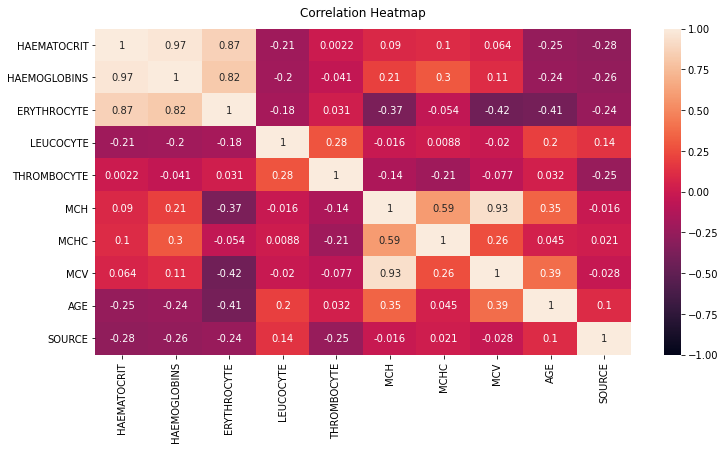

In [573]:

plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True) ### checking the correlation between the features
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);



### QUESTIONS

1. Does the age of the patient have an influence on whether the patient will be an incare or outcare?

2. Is there a relationship between the LEAUCOCYTE and the SOURCE column?

3. Can we make any inference from the sex column? 

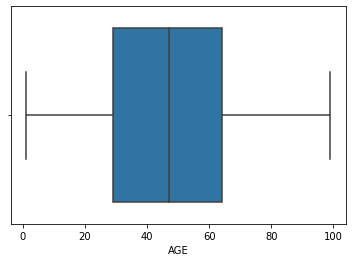

In [574]:

sns.boxplot (x= 'AGE', hue= 'SOURCE', data =train);


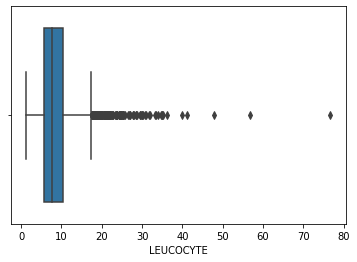

In [575]:
sns.boxplot (x= 'LEUCOCYTE', hue= 'SOURCE', data =train);

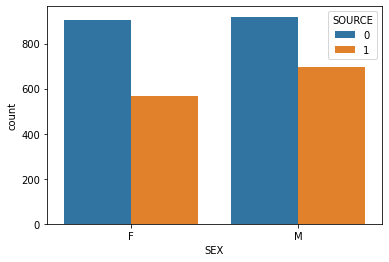

In [576]:




sns.countplot (x= 'SEX', hue= 'SOURCE', data =train);

In [577]:
from sklearn import preprocessing

le_SEX = preprocessing.LabelEncoder()

train.SEX= le_SEX.fit_transform(train.SEX)


In [578]:

test.SEX = le_SEX.transform(test.SEX)

In [579]:
num_feat.append ('SEX')

In [580]:
cat_feat.remove ('SEX')

### Feature Scaling

- It is necessary to do feature scaling to bring all features in the same standing so that one significant number doesn’t impact the model just because of their large magnitude.

- In the train data for instance, the maximum in ERYTHROCYTE is 8.07 and the maximum in THROMBOCYTE is 1188, so it will be safe to create scaled values of our features.

In [581]:
###instantitiate standard scaler.

scaler = StandardScaler()
cols = num_feat

x = scaler.fit_transform(train[num_feat])
testing = scaler.fit_transform(test[num_feat])


In [582]:
# create a dataframe out of the scaled data so we can still have values we can relate with instead of the array values.

x= pd.DataFrame(data = x, columns= cols)
testing=pd.DataFrame(data = testing, columns= cols)

x.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
0,0.859740,0.884487,0.969308,-1.145159,-0.204812,-0.270204,0.201741,-0.416803,-0.674221,-1.048452
1,0.975071,0.836973,0.426484,-0.294476,-0.048949,0.557415,-0.368527,0.860011,-0.305237,0.953787
2,-0.359484,-0.065793,-0.229956,-0.195559,0.020324,0.256463,1.342278,-0.284719,0.847840,-1.048452
3,1.271639,0.979515,0.792575,-0.057076,0.513893,0.143605,-0.938796,0.625195,0.248240,0.953787
4,-1.084428,-0.826018,-0.886395,3.583056,-0.352017,0.143605,1.179345,-0.328747,0.893963,-1.048452


In [583]:
y= train.SOURCE

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state = 42)

In [584]:
x_train

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
438,1.535255,1.834768,1.348023,-0.254909,0.713052,0.519796,1.260811,0.023478,-1.043205,0.953787
2149,0.579648,0.646917,0.312869,-0.136209,-0.178835,0.444558,0.364675,0.375703,-0.259114,0.953787
969,-0.079392,-0.018279,-0.065846,-0.076859,-0.559835,0.030748,0.283208,-0.079254,-2.011789,-1.048452
2501,-2.270699,-2.536523,-1.871054,-0.274692,-0.074926,-1.511634,-2.486667,-0.710324,-0.443606,-1.048452
1945,1.189259,1.217085,0.325493,-0.492309,0.020324,1.385035,0.283208,1.476405,0.571101,0.953787
...,...,...,...,...,...,...,...,...,...,...
1638,0.530220,0.314319,0.615841,-0.175776,-0.213471,-0.608776,-0.775862,-0.328747,-0.351360,-1.048452
1095,-0.194724,-0.065793,-0.495056,0.259458,1.726167,0.820749,0.609076,0.683899,0.663347,-1.048452
1130,-2.682599,-2.061382,-2.716851,0.022058,-1.936632,2.588846,4.112154,1.036124,0.847840,-1.048452
1294,0.200700,0.266805,0.035145,-0.254909,0.496575,0.331701,0.364675,0.243618,-1.089328,-1.048452


### BUILDING A BASE MODEL

In [585]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [586]:


lr_pred = lr.predict(x_test)

In [587]:

from sklearn.metrics import f1_score

In [588]:


f1_score(y_test, lr_pred, average= 'micro')

0.7313725490196079

In [589]:

sample

,patient_id_,SOURCE
0,patient_id_4373,1
1,patient_id_2204,1
2,patient_id_93,1
3,patient_id_798,1
4,patient_id_789,1
...,...,...
1319,patient_id_2070,1
1320,patient_id_1789,1
1321,patient_id_1725,1
1322,patient_id_3707,1


In [590]:

submission_file= sample.copy()

In [591]:
submission_file.SOURCE = lr.predict(testing)

In [592]:
submission_file


,patient_id_,SOURCE
0,patient_id_4373,0
1,patient_id_2204,1
2,patient_id_93,0
3,patient_id_798,0
4,patient_id_789,1
...,...,...
1319,patient_id_2070,0
1320,patient_id_1789,1
1321,patient_id_1725,0
1322,patient_id_3707,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


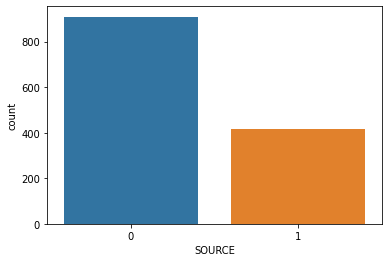

In [593]:
sns.countplot(submission_file.SOURCE)

In [594]:
submission_file.to_csv('my_second_submission.csv', index= False)

### Using Decision Tree

In [595]:

from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier (criterion = 'entropy', random_state= 42)
dc.fit (x_train, y_train)

   

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [596]:
dc_pred = dc.predict(x_test)

In [597]:
f1_score(y_test, dc_pred, average= 'micro')

0.6647058823529411

In [598]:
from sklearn.naive_bayes import GaussianNB
naivemodel= GaussianNB()
naivemodel.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [599]:
GaussianNB()

GaussianNB(priors=None, var_smoothing=1e-09)

In [600]:
naivemodel_prediction = naivemodel.predict(x_test)

In [601]:
#naivemodel_prediction

In [602]:
f1_score(y_test, naivemodel_prediction, average= 'micro')

0.7127450980392156

In [603]:
from sklearn.ensemble import RandomForestClassifier

rf =RandomForestClassifier()

rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [604]:
rf_predict = rf.predict(x_test)
#rf_predict

In [605]:
f1_score(y_test,rf_predict, average= 'micro')

0.7382352941176471

In [606]:
pip install xgboost

In [607]:
from xgboost import XGBClassifier

xgboost_model = XGBClassifier(use_label_encoder =False)
xgbmodel = xgboost_model.fit(x_train, y_train)

In [608]:
xgb_predict= xgboost_model.predict(x_test)

In [609]:
f1_score(y_test,xgb_predict, average= 'micro')

0.7441176470588236

In [610]:
#xgb_predict


In [611]:
sample.head()

,patient_id_,SOURCE
0,patient_id_4373,1
1,patient_id_2204,1
2,patient_id_93,1
3,patient_id_798,1
4,patient_id_789,1


In [316]:
submission_file = sample.copy()
submission_file

,patient_id_,SOURCE
0,patient_id_4373,1
1,patient_id_2204,1
2,patient_id_93,1
3,patient_id_798,1
4,patient_id_789,1
...,...,...
1319,patient_id_2070,1
1320,patient_id_1789,1
1321,patient_id_1725,1
1322,patient_id_3707,1


In [612]:
from sklearn.svm import SVC 
svm_model= SVC()

svm_model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [613]:
svm_predict = svm_model.predict(x_test)

In [614]:
f1_score(y_test,svm_predict, average= 'micro')

0.7470588235294117

In [617]:
submission_file3 = sample.copy()
submission_file3

,patient_id_,SOURCE
0,patient_id_4373,1
1,patient_id_2204,1
2,patient_id_93,1
3,patient_id_798,1
4,patient_id_789,1
...,...,...
1319,patient_id_2070,1
1320,patient_id_1789,1
1321,patient_id_1725,1
1322,patient_id_3707,1


In [619]:
submission_file3.SOURCE = svm_model.predict(testing)

In [620]:
submission_file.to_csv('my_third_submission.csv', index= False)